In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_data.csv")
df

,Unnamed: 0,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.pop("Unnamed: 0")

0            0
1            1
2            2
3            3
4            4
         ...  
32576    32576
32577    32577
32578    32578
32579    32579
32580    32580
Name: Unnamed: 0, Length: 32581, dtype: int64

In [6]:
df

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32581 non-null  int64  
 1   annual_income           32581 non-null  int64  
 2   home_ownership          32581 non-null  object 
 3   employment_length_year  32581 non-null  float64
 4   loan_intent             32581 non-null  object 
 5   loan_grade              32581 non-null  object 
 6   loan_amount             32581 non-null  int64  
 7   interest_rate           32581 non-null  float64
 8   loan_status             32581 non-null  int64  
 9   percent_income          32581 non-null  float64
 10  historical_default      32581 non-null  object 
 11  credit_history_length   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
y = df.pop("loan_status")
X = df

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state =0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24435, 11) (24435,)
(8146, 11) (8146,)


In [12]:
X_train.dtypes

age                         int64
annual_income               int64
home_ownership             object
employment_length_year    float64
loan_intent                object
loan_grade                 object
loan_amount                 int64
interest_rate             float64
percent_income            float64
historical_default         object
credit_history_length       int64
dtype: object

In [15]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

In [17]:
X_train_cat.head()

,home_ownership,loan_intent,loan_grade,historical_default
12231,MORTGAGE,PERSONAL,A,N
23891,MORTGAGE,HOMEIMPROVEMENT,A,N
1191,RENT,HOMEIMPROVEMENT,E,N
8463,MORTGAGE,DEBTCONSOLIDATION,A,N
17638,RENT,PERSONAL,D,Y


In [18]:
X_train_num.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length
12231,22,80000,4.0,7250,11.011695,0.09,3
23891,30,67000,6.0,10000,6.990000,0.15,6
1191,25,59160,0.0,16600,14.180000,0.28,4
8463,24,58000,5.0,7000,6.990000,0.12,4
17638,24,46000,0.0,5975,14.460000,0.13,4


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                       columns = scaler.get_feature_names_out(),
                                       index = X_train_num.index)

X_train_num_transformed.head()


,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length
12231,-0.905024,0.204465,-0.191550,-0.372728,0.000181,-0.751368,-0.690988
23891,0.360863,0.008150,0.285592,0.062224,-1.306708,-0.190787,0.050929
1191,-0.430316,-0.110243,-1.145836,1.106109,1.029752,1.023804,-0.443682
8463,-0.588552,-0.127760,0.047021,-0.412269,-1.306708,-0.471077,-0.443682
17638,-0.588552,-0.308974,-1.145836,-0.574387,1.120741,-0.377647,-0.443682


In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print(X_train_cat.shape)
print(X_train_cat_transformed.shape)

X_train_cat_transformed.head()



(24435, 4)
(24435, 19)


,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,historical_default_N,historical_default_Y
12231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23891,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1191,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8463,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first', sparse_output=False)

X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                                       columns = encoder_.get_feature_names_out(),
                                       index = X_train_cat.index)

print(X_train_cat.shape)
print(X_train_cat_transformed.shape)

X_train_cat_transformed.head()

(24435, 4)
(24435, 15)


,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,historical_default_Y
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
12231
23891
1191
8463
17638


In [34]:
home_ownership_encoder = {'RENT' : 1, 'MORTGAGE' : 2, 'OWN' : 3, 'OTHER' : 4}
loan_intent_encoder = {'MEDICAL':1, 'PERSONAL':2, 'EDUCATION':3, 'HOMEIMPROVEMENT':4, 'DEBTCONSOLIDATION':5, 'VENTURE':6, }
loan_grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
historical_default_encoder = {'Y':1, 'N':2}
# Apply Label Encoding
X_train_cat_transformed['home_ownership'] = X_train_cat['home_ownership'].map(home_ownership_encoder)
X_train_cat_transformed['loan_intent'] = X_train_cat['loan_intent'].map(loan_intent_encoder)
X_train_cat_transformed['loan_grade'] = X_train_cat['loan_grade'].map(loan_grade_encoder)
X_train_cat_transformed['historical_default'] = X_train_cat['historical_default'].map(historical_default_encoder)

X_train_cat_transformed.head()

,home_ownership,loan_intent,loan_grade,historical_default
12231,2,2,1,2
23891,2,4,1,2
1191,1,4,5,2
8463,2,5,1,2
17638,1,2,4,1


In [35]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length,home_ownership,loan_intent,loan_grade,historical_default
12231,-0.905024,0.204465,-0.191550,-0.372728,0.000181,-0.751368,-0.690988,2,2,1,2
23891,0.360863,0.008150,0.285592,0.062224,-1.306708,-0.190787,0.050929,2,4,1,2
1191,-0.430316,-0.110243,-1.145836,1.106109,1.029752,1.023804,-0.443682,1,4,5,2
8463,-0.588552,-0.127760,0.047021,-0.412269,-1.306708,-0.471077,-0.443682,2,5,1,2
17638,-0.588552,-0.308974,-1.145836,-0.574387,1.120741,-0.377647,-0.443682,1,2,4,1


In [36]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [37]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length
2124,-0.588552,-0.379950,-0.668693,-1.139825,0.542313,-1.031658,-0.938293
252,-0.588552,0.279971,0.047021,2.434689,-0.127104,1.117235,-0.443682
13083,-0.588552,0.325274,-0.191550,-0.570433,-0.357825,-0.938228,-0.938293
12447,-0.746788,0.221378,-0.430122,0.853046,-0.247339,0.089503,-0.443682
31009,1.784986,0.098757,-0.430122,0.062224,-1.137729,-0.284217,2.029373


In [39]:
X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['home_ownership'] = X_test_cat['home_ownership'].map(home_ownership_encoder)
X_test_cat_transformed['loan_intent'] = X_test_cat['loan_intent'].map(loan_intent_encoder)
X_test_cat_transformed['loan_grade'] = X_test_cat['loan_grade'].map(loan_grade_encoder)
X_test_cat_transformed['historical_default'] = X_test_cat['historical_default'].map(historical_default_encoder)

X_test_cat_transformed.head()

,home_ownership,loan_intent,loan_grade,historical_default
2124,1,3,3,2
252,1,1,2,2
13083,2,1,2,2
12447,2,2,2,2
31009,2,6,1,2


In [40]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length,home_ownership,loan_intent,loan_grade,historical_default
2124,-0.588552,-0.379950,-0.668693,-1.139825,0.542313,-1.031658,-0.938293,1,3,3,2
252,-0.588552,0.279971,0.047021,2.434689,-0.127104,1.117235,-0.443682,1,1,2,2
13083,-0.588552,0.325274,-0.191550,-0.570433,-0.357825,-0.938228,-0.938293,2,1,2,2
12447,-0.746788,0.221378,-0.430122,0.853046,-0.247339,0.089503,-0.443682,2,2,2,2
31009,1.784986,0.098757,-0.430122,0.062224,-1.137729,-0.284217,2.029373,2,6,1,2


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8553891480481218

In [64]:
output_df = pd.DataFrame({'Actual': y_test})

In [65]:
output_df['Logistic Regression Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0
...,...,...
1438,1,0
28083,0,0
22127,0,0
10487,0,0


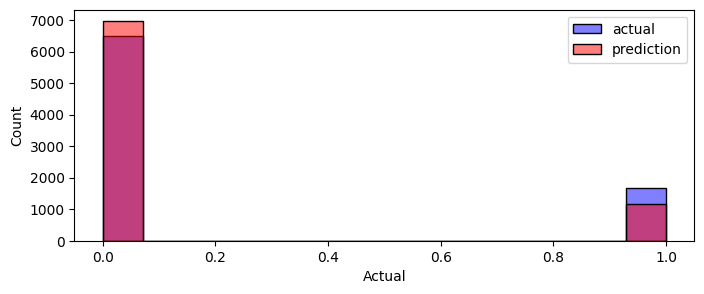

In [66]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Logistic Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8919715197643014

In [74]:
output_df['KNN classifier Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN classifier Predictions
2124,0,0,0
252,0,0,0
13083,0,0,0
12447,0,0,0
31009,0,0,0
...,...,...,...
1438,1,0,0
28083,0,0,0
22127,0,0,0
10487,0,0,0


In [75]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[6243,  239],
       [ 641, 1023]], dtype=int64)

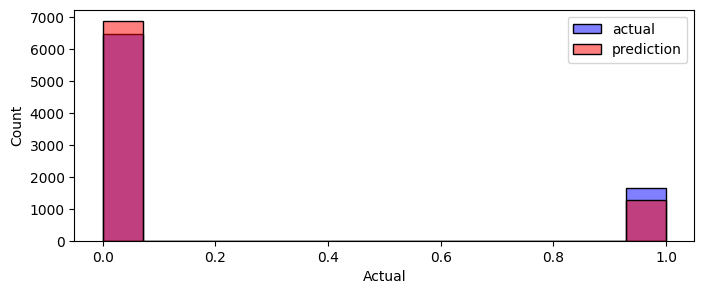

In [76]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN classifier Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [77]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8877976921188313

In [78]:
output_df['DT Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN classifier Predictions,DT Predictions
2124,0,0,0,0
252,0,0,0,0
13083,0,0,0,0
12447,0,0,0,0
31009,0,0,0,0
...,...,...,...,...
1438,1,0,0,0
28083,0,0,0,0
22127,0,0,0,0
10487,0,0,0,0


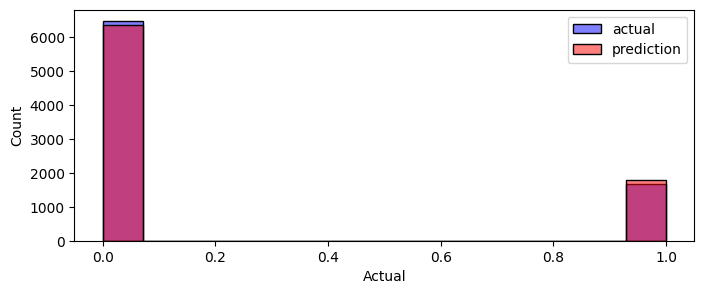

In [80]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()


In [87]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8945494721335625

In [88]:
output_df['SVC Predictions'] = y_test_pred

output_df

,Actual,Logistic Regression Predictions,KNN classifier Predictions,DT Predictions,SVC Predictions
2124,0,0,0,0,0
252,0,0,0,0,0
13083,0,0,0,0,0
12447,0,0,0,0,0
31009,0,0,0,0,0
...,...,...,...,...,...
1438,1,0,0,0,0
28083,0,0,0,0,0
22127,0,0,0,0,0
10487,0,0,0,0,0


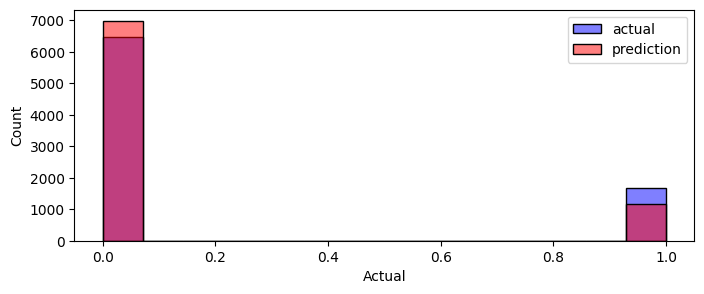

In [90]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['SVC Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()
plt.show()